## <font color=blue>1. 了解背景和目標<font><br>


- The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew.** This sensational tragedy shocked the international community and led to better safety regulations for ships.

> - Titanic 沈船事件中，總共2224人中有1502人喪身。

- One of the reasons that the shipwreck led to such loss of life was that **there were not enough lifeboats for the passengers and crew**. Although there was some element of luck involved in surviving the sinking, **some groups of people were more likely to survive than others, such as women, children, and the upper-class.**

> - 這麼多人喪身最主要的原因就是救生艇的不足。
> - 獲救的人並不是隨機的，例如女人，小孩，頭等艙乘客等獲救的機會較大。

- In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> - 這個比賽目標，要根據訓練跟測試數據中一些乘客的個人資訊以及存活狀況，嘗試去利用machine learning的方式去預測其他人的存活狀況。

## <font color=blue>2. 了解評估標準<font><br>

[評分方式](https://www.kaggle.com/c/titanic#evaluation)

- **Metric**: Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

> - 利用accuracy當作評估標準。

## <font color=blue>3. 認識數據 <font><br>


In [8]:
# 先import所需要的library
import pandas as pd  # 用於數據分析
import numpy as np # 用於科學計算
from pandas import Series,DataFrame

In [9]:
# 載入訓練集
data_train = pd.read_csv("Train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 認識數據中的欄位意義。

利用**data_train.columns**來初步認識數據中各個欄位。

 - PassengerId => 乘客ID<br>
 - Survived => 是否生存<br>
 - Pclass => 乘客等级(1/2/3等艙位)<br>
 - Name => 乘客姓名<br>
 - Sex => 性别<br>
 - Age => 年齡<br>
 - SibSp => 堂兄弟/妹個數<br>
 - Parch => 父母與小孩個數<br>
 - Ticket => 船票信息<br>
 - Fare => 票價<br>
 - Cabin => 客艙<br>
 - Embarked => 登船港口

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 檢查數據的數量是否有缺失。

利用**data_train.info()**來了解數據的數量是否有缺失。

- 訓練集總共有891筆資料。
- Age跟Cabin的資訊有缺少。
 - Age只有714筆。
 - Cabin只有204筆。


In [11]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 認識基本的數據分佈

利用**data_train.describe()**來了解基本的數據分佈。

- 平均年紀29.69歲。
- 平均存活率0.38。 


## <font color=blue>4. 分析數據 <font><br>

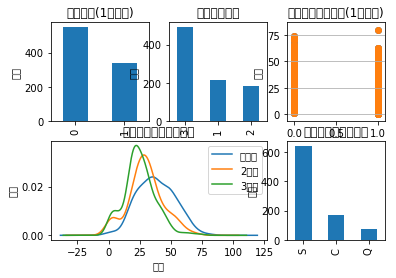

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure() # 建立圖表物件
fig.set(alpha=0.2) # 設定圖表顏色alpha值

plt.subplot2grid((2,3),(0,0)) # (shape, loc)，將圖片物件切割成2列3行，左上角的第一個小圖表
data_train.Survived.value_counts().plot(kind='bar') # 統計生存人數，並繪製成長條圖
plt.title("獲救情況(1為獲救)") # 圖表title
plt.ylabel("人數")


plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel("人數")
plt.title("乘客等級分佈")


plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年齡")                        
plt.grid(b=True, which='major', axis='y') 
plt.title("按年齡看獲救分佈(1為獲救)")


plt.subplot2grid((2,3),(1,0), colspan=2) # colspan 佔據2行空間
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年齡")
plt.ylabel("密度")
plt.title("各等級的乘客年齡分佈")
plt.legend(('頭等艙','2等艙','3等艙'), loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("登船口的上船人數")
plt.ylabel("人數") 

plt.show()

- 從各種不同圖表來進行分析

 - 從**獲救情況**分析，被救人數約300多一點點，不到一半。
 - 從**乘客等級分佈**分析，3等艙的乘客非常多。
 - 從**年齡看獲救分佈**分析，遇難和獲救的人的年齡分佈似乎都廣。
 - 從**各等級的乘客年齡分佈**分析，2,3等艙的年紀較輕大約20多歲，頭等艙年紀大約40歲左右。
 - 從**登船口的上船人數**分析，S岸口人數最多，遠大於另外2個岸口。
 
- 思路

 - 不同艙等的客人獲救的機率是否有不同?
 - 不同性別的客人獲救的機率是否有不同?
 - 不同登船口的客人獲救的機率是否有不同?

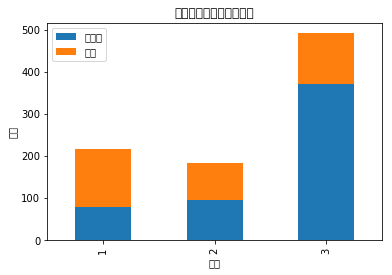

In [22]:
# 不同艙等的客人獲救的機率是否有不同
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'獲救':Survived_1, '未獲救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("不同艙等的客人獲救情況")
plt.xlabel('艙等')
plt.ylabel('人數')

plt.show()

### <font color=red>頭等艙的客人明顯獲救的機率高很多，所以這絕對是影之後預測獲救機率的一個重要特徵。<font>

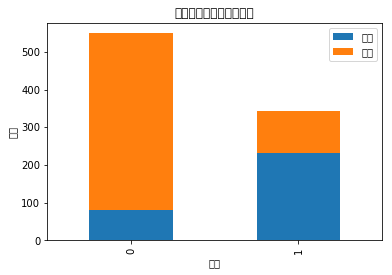

In [23]:
# 不同性別的客人獲救的機率是否有不同?
fig = plt.figure()
fig.set(alpha=0.2)

Survivied_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survivied_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性': Survivied_m, '女性': Survivied_f})
df.plot(kind='bar', stacked=True)
plt.title("不同性別的客人獲救情况")
plt.xlabel("性别") 
plt.ylabel("人數")

plt.show()

### <font color=red>女性明顯獲救的機率高很多，所以這絕對是影之後預測獲救機率的一個重要特徵。<font>

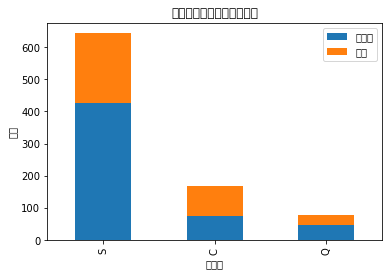

In [25]:
# 不同登船口的客人獲救的機率是否有不同?
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'獲救':Survived_1, '未獲救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("不同登船口的客人獲救情况")
plt.xlabel("登船口") 
plt.ylabel("人數") 

plt.show()

### <font color=red>不同的等船口似乎對獲救機率沒有明顯的影響。<font>

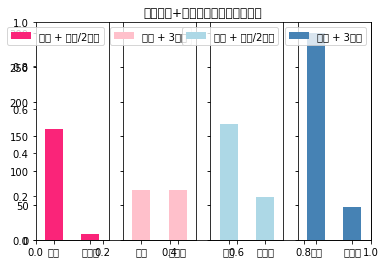

In [31]:
# 近一步分析 
# 不同性別+不同艙等的客人獲救的機率是否有不同?
fig = plt.figure()
fig.set(alpha=0.65) 
plt.title("不同性別+不同艙等的客人獲救情况")

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', label = "female highclass", color = '#FA2479')
ax1.set_xticklabels(["獲救", "未獲救"], rotation = 0)
ax1.legend(["女性 + 頭等/2等艙"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["獲救", "未獲救"], rotation=0)
plt.legend(["女性 + 3等艙"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(["獲救", "未獲救"], rotation=0)
plt.legend(["男性 + 頭等/2等艙"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["獲救", "未獲救"], rotation=0)
plt.legend(["男性 + 3等艙"], loc='best')

plt.show()